# 시작

In [1]:
import pandas as pd

# Excel 파일 경로
excel_file_path = r"C:\Users\LG\Desktop\Paper\Paper_Code\DATA\IRAN.xlsx"

# Excel 파일 읽어오기
iran = pd.read_excel(excel_file_path)
iran


,GDP,Exchange rate,Oil Production,Oil Export,International Reserves
0,109592000000,1764.856069,3661000.000,2.096687e+06,2858558924
1,126879000000,1753.985685,3571700.000,1.925032e+06,3664448645
2,128627000000,6907.034456,3248200.000,1.982782e+06,21419185543
3,153545000000,8193.887519,3754000.000,2.262897e+06,22035185543
4,190043000000,8613.989421,3990000.000,2.279872e+06,29553185543
5,226452000000,8963.958907,4014000.000,2.185512e+06,44127185543
6,266299000000,9170.942878,4040000.000,2.256663e+06,55511185543
7,349882000000,9281.151828,4094000.000,2.225072e+06,70765185543
8,412336000000,9428.528261,3942916.667,2.131074e+06,78994185543
9,416397000000,9864.302456,3725000.000,2.019443e+06,71726185543


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

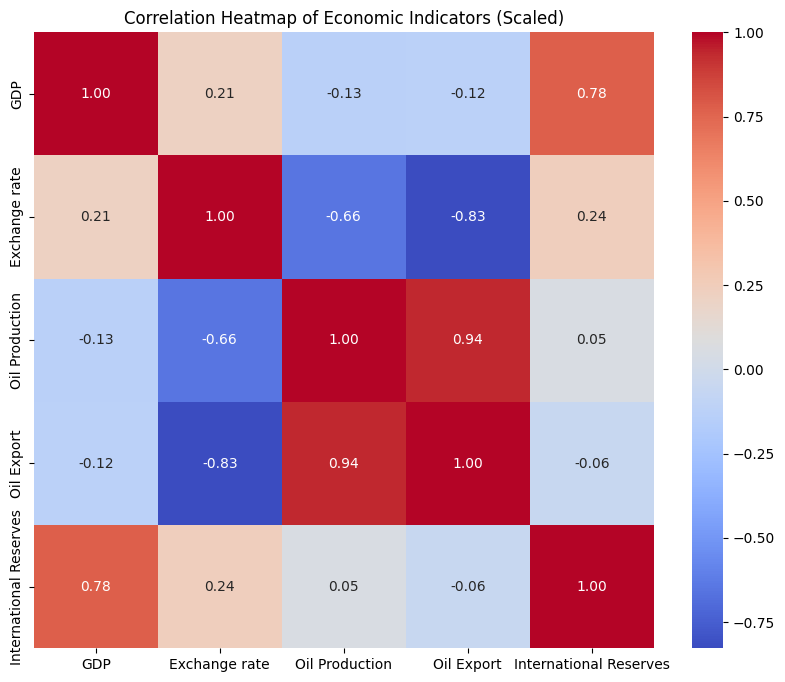

In [3]:
iran = pd.DataFrame(iran)

# Min-Max 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(iran)

# 스케일링된 데이터로 데이터프레임 업데이트
df_scaled = pd.DataFrame(scaled_data, columns=iran.columns)

# 상관 행렬 생성
corr_matrix = df_scaled.corr()

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Economic Indicators (Scaled)')
plt.show()


In [4]:
corr_matrix

,GDP,Exchange rate,Oil Production,Oil Export,International Reserves
GDP,1.000000,0.214849,-0.130977,-0.121145,0.777121
Exchange rate,0.214849,1.000000,-0.655232,-0.827976,0.240559
Oil Production,-0.130977,-0.655232,1.000000,0.936559,0.052217
Oil Export,-0.121145,-0.827976,0.936559,1.000000,-0.055533
International Reserves,0.777121,0.240559,0.052217,-0.055533,1.000000


                 Variable         VIF
0                     GDP   14.308594
1           Exchange rate   15.749389
2          Oil Production  286.807126
3              Oil Export  220.567902
4  International Reserves    8.211948


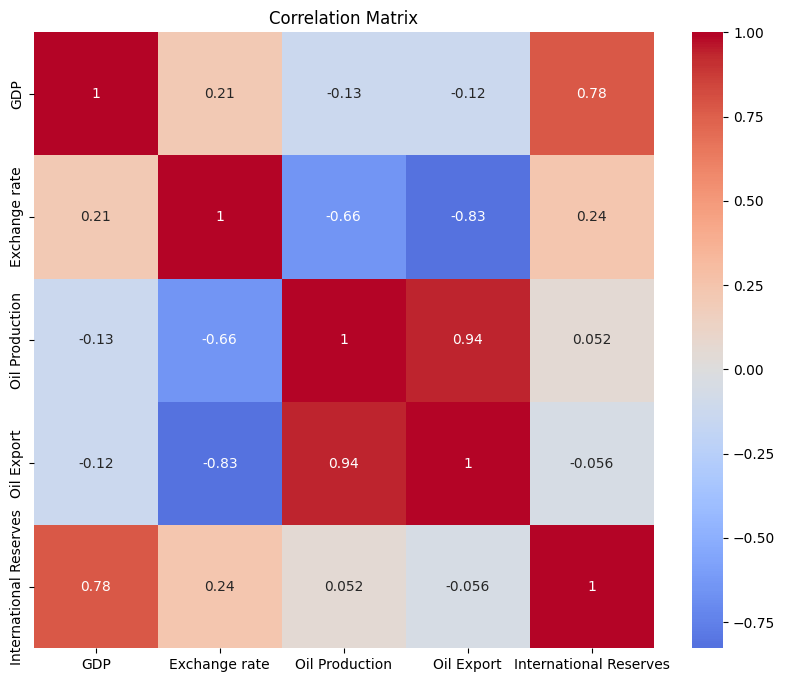

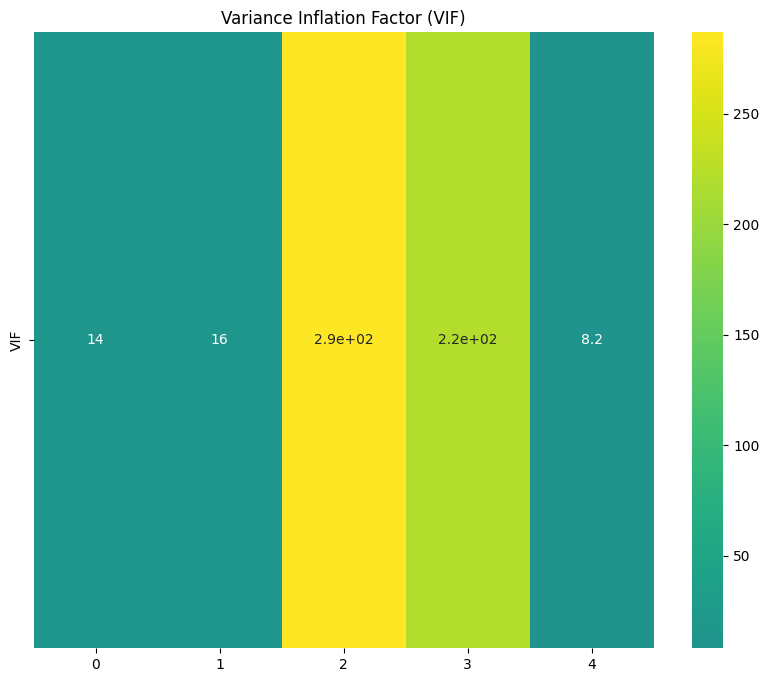

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(iran):
    vif = pd.DataFrame()
    vif['Variable'] = iran.columns
    vif['VIF'] = [variance_inflation_factor(iran.values, i) for i in range(iran.shape[1])]
    return vif

# VIF 계산
vif_df = calculate_vif(iran)
print(vif_df)

# 상관행렬 계산
corr_matrix = iran.corr()

# 상관행렬 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# VIF 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(vif_df[['VIF']].T, annot=True, cmap='viridis', center=0)
plt.title('Variance Inflation Factor (VIF)')
plt.show()
